In [5]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
ts_data_complete = pd.read_csv("renewables_data.cleaned.csv")
ts_data_complete

,Unnamed: 0,Hour,Geothermal,Biomass,Biogas,Small Hydro,Wind,Solar,Date
0,0,1,1056,323,170,250,632,0.0,2010-04-20 00:00:00
1,1,2,1055,318,169,245,632,0.0,2010-04-20 01:00:00
2,2,3,1058,316,168,240,677,0.0,2010-04-20 02:00:00
3,3,4,1063,318,168,238,923,0.0,2010-04-20 03:00:00
4,4,5,1066,318,168,247,875,0.0,2010-04-20 04:00:00
5,5,6,1066,317,169,247,998,0.0,2010-04-20 05:00:00
6,6,7,1066,312,166,244,763,0.0,2010-04-20 06:00:00
7,7,8,1067,313,167,269,544,1.0,2010-04-20 07:00:00
8,8,9,1065,315,169,280,572,191.0,2010-04-20 08:00:00
9,9,10,1063,316,167,294,721,299.0,2010-04-20 09:00:00


In [10]:
time_series_geo = ts_data_complete[['Date', 'Geothermal']]
time_series_geo = time_series_geo.set_index('Date')
time_series_geo

,Geothermal
Date,
2010-04-20 00:00:00,1056
2010-04-20 01:00:00,1055
2010-04-20 02:00:00,1058
2010-04-20 03:00:00,1063
2010-04-20 04:00:00,1066
2010-04-20 05:00:00,1066
2010-04-20 06:00:00,1066
2010-04-20 07:00:00,1067
2010-04-20 08:00:00,1065


In [15]:
time_series_geo = time_series_geo.astype('float64')

                             ARIMA Model Results                              
Dep. Variable:           D.Geothermal   No. Observations:                21111
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -163606.586
Method:                       css-mle   S.D. of innovations            561.590
Date:                Fri, 27 Apr 2018   AIC                         327225.173
Time:                        00:39:11   BIC                         327272.918
Sample:                    04-20-2010   HQIC                        327240.753
                         - 09-15-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0883      3.874      0.023      0.982      -7.504       7.681
ar.L1.D.Geothermal     0.8305      0.000   3978.872      0.000       0.830       0.831
ar.L2.D.Geothermal  

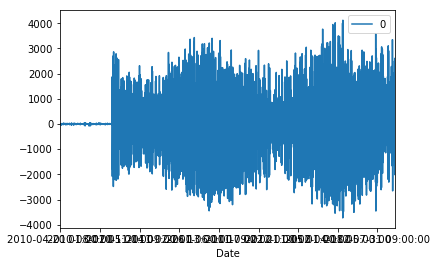

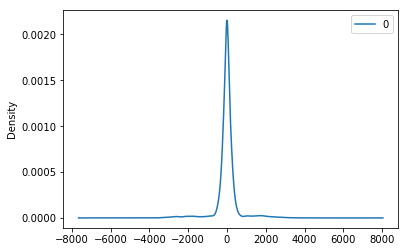

                  0
count  21111.000000
mean      -0.002420
std      561.603296
min    -3729.244443
25%     -125.955267
50%        0.014756
75%      120.996730
max     4115.869846


In [16]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

#def parser(x):
#	return datetime.strptime('20'+x, '%Y-%m' '%h:%m')

#series = read_csv('TS1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = time_series_geo
#series[8729:]
# fit model
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())



predicted=1918.417901, expected=2197.000000
predicted=2206.619649, expected=2455.000000
predicted=2468.802604, expected=2459.000000
predicted=2466.880953, expected=2416.000000
predicted=2416.315274, expected=2473.000000
predicted=2464.761946, expected=2443.000000
predicted=2433.969798, expected=2372.000000
predicted=2370.136946, expected=2689.000000
predicted=2697.348753, expected=993.000000
predicted=950.042774, expected=994.000000
predicted=959.788574, expected=994.000000
predicted=970.894152, expected=994.000000
predicted=984.640511, expected=992.000000
predicted=1050.966129, expected=992.000000
predicted=991.913551, expected=991.000000
predicted=990.937744, expected=991.000000
predicted=990.973840, expected=990.000000
predicted=990.022124, expected=2006.000000
predicted=2034.435030, expected=1924.000000
predicted=1945.782178, expected=1978.000000
predicted=1992.770390, expected=2194.000000
predicted=2199.190166, expected=2254.000000
predicted=2226.411366, expected=2301.000000
predi

predicted=1018.345301, expected=987.000000
predicted=986.960703, expected=987.000000
predicted=986.995261, expected=987.000000
predicted=986.995262, expected=987.000000
predicted=986.995263, expected=1877.000000
predicted=1901.604847, expected=1880.000000
predicted=1900.967797, expected=1862.000000
predicted=1874.751294, expected=1850.000000
predicted=1848.490633, expected=1823.000000
predicted=1791.003014, expected=1806.000000
predicted=1804.687946, expected=1831.000000
predicted=1831.580604, expected=1842.000000
predicted=1843.132371, expected=1882.000000
predicted=1884.734973, expected=1907.000000
predicted=1909.408883, expected=1922.000000
predicted=1922.772935, expected=1922.000000
predicted=1922.359917, expected=1967.000000
predicted=1967.118205, expected=990.000000
predicted=963.237478, expected=990.000000
predicted=967.282909, expected=990.000000
predicted=975.555433, expected=989.000000
predicted=988.364190, expected=989.000000
predicted=1022.740935, expected=989.000000
predic

predicted=3149.570618, expected=2843.000000
predicted=2836.142591, expected=2660.000000
predicted=2651.931618, expected=2505.000000
predicted=2486.762627, expected=2533.000000
predicted=2527.283207, expected=991.000000
predicted=958.160609, expected=992.000000
predicted=962.086771, expected=992.000000
predicted=974.479716, expected=993.000000
predicted=993.074026, expected=995.000000
predicted=1047.598841, expected=997.000000
predicted=997.078504, expected=998.000000
predicted=998.099646, expected=1000.000000
predicted=1000.068424, expected=1000.000000
predicted=999.989172, expected=2369.000000
predicted=2406.154955, expected=2416.000000
predicted=2449.881301, expected=2431.000000
predicted=2452.781363, expected=2523.000000
predicted=2525.764855, expected=2737.000000
predicted=2698.691976, expected=3036.000000
predicted=3049.093255, expected=2769.000000
predicted=2771.587862, expected=2747.000000
predicted=2741.357486, expected=2860.000000
predicted=2851.284854, expected=3046.000000
pr

predicted=997.909004, expected=1979.000000
predicted=2005.180632, expected=1911.000000
predicted=1932.371124, expected=1891.000000
predicted=1903.221839, expected=1913.000000
predicted=1911.399604, expected=1888.000000
predicted=1854.521260, expected=1869.000000
predicted=1870.590969, expected=1948.000000
predicted=1950.014714, expected=2439.000000
predicted=2453.082772, expected=2857.000000
predicted=2881.925331, expected=3005.000000
predicted=3026.679029, expected=2725.000000
predicted=2724.054309, expected=2334.000000
predicted=2302.142353, expected=2156.000000
predicted=2123.749384, expected=998.000000
predicted=952.228416, expected=996.000000
predicted=975.775674, expected=996.000000
predicted=992.604516, expected=996.000000
predicted=1003.172202, expected=995.000000
predicted=1034.283389, expected=996.000000
predicted=996.067004, expected=997.000000
predicted=997.032146, expected=995.000000
predicted=994.981426, expected=993.000000
predicted=992.942050, expected=3087.000000
predi

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=2050.446586, expected=1977.000000
predicted=1934.435004, expected=1819.000000
predicted=1815.421445, expected=1787.000000
predicted=1783.435087, expected=1769.000000
predicted=1765.482159, expected=1754.000000
predicted=1755.506678, expected=1776.000000
predicted=1781.371714, expected=1780.000000
predicted=1781.555291, expected=1767.000000
predicted=1767.735944, expected=1748.000000
predicted=1747.768682, expected=1000.000000
predicted=978.569561, expected=1000.000000
predicted=981.829919, expected=1000.000000
predicted=989.558620, expected=1001.000000
predicted=1002.439652, expected=1000.000000
predicted=1025.176031, expected=1000.000000
predicted=999.987100, expected=998.000000
predicted=997.926976, expected=1000.000000
predicted=999.969740, expected=999.000000
predicted=999.021471, expected=1952.000000
predicted=1977.596647, expected=1969.000000
predicted=1992.201715, expected=2017.000000
predicted=2032.565230, expected=2000.000000
predicted=2000.039264, expected=2065.0000

predicted=1075.100277, expected=1010.000000
predicted=1009.967713, expected=1008.000000
predicted=1007.923795, expected=1008.000000
predicted=1007.915136, expected=1006.000000
predicted=1005.880079, expected=3521.000000
predicted=3588.471038, expected=3310.000000
predicted=3364.227391, expected=3133.000000
predicted=3160.685543, expected=3674.000000
predicted=3679.235492, expected=3814.000000
predicted=3743.848324, expected=3622.000000
predicted=3635.757044, expected=3204.000000
predicted=3196.187071, expected=3165.000000
predicted=3133.137852, expected=3370.000000
predicted=3363.831663, expected=3714.000000
predicted=3734.284145, expected=3471.000000
predicted=3489.861680, expected=3605.000000
predicted=3609.376826, expected=3738.000000
predicted=3734.102765, expected=1006.000000
predicted=927.344201, expected=1007.000000
predicted=953.295122, expected=1008.000000
predicted=961.750058, expected=1009.000000
predicted=1007.066681, expected=1001.000000
predicted=1092.742439, expected=100

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1090.096175, expected=1011.000000
predicted=1011.010882, expected=1012.000000
predicted=1011.988426, expected=1012.000000
predicted=1011.986400, expected=1012.000000
predicted=1012.012247, expected=3462.000000
predicted=3526.235025, expected=3389.000000
predicted=3443.151458, expected=3387.000000
predicted=3422.465745, expected=3446.000000
predicted=3443.361275, expected=3452.000000
predicted=3371.485595, expected=3493.000000
predicted=3497.703765, expected=3588.000000
predicted=3591.657099, expected=3631.000000
predicted=3633.090680, expected=3701.000000
predicted=3705.160392, expected=3797.000000
predicted=3800.431602, expected=3740.000000
predicted=3738.698899, expected=3358.000000
predicted=3346.809714, expected=3278.000000
predicted=3264.020621, expected=1006.000000
predicted=935.866058, expected=1006.000000
predicted=954.928319, expected=1005.000000
predicted=983.481366, expected=1004.000000
predicted=1009.743365, expected=1004.000000
predicted=1080.166134, expected=100

predicted=3401.577036, expected=3304.000000
predicted=3308.673632, expected=3151.000000
predicted=3136.974924, expected=3264.000000
predicted=3245.215714, expected=3469.000000
predicted=3473.469493, expected=970.000000
predicted=914.308572, expected=968.000000
predicted=919.768084, expected=965.000000
predicted=922.224171, expected=922.000000
predicted=916.974166, expected=925.000000
predicted=1008.161130, expected=928.000000
predicted=927.544069, expected=930.000000
predicted=930.311982, expected=929.000000
predicted=930.498472, expected=928.000000
predicted=927.869673, expected=3605.000000
predicted=3674.415276, expected=3743.000000
predicted=3806.953339, expected=3743.000000
predicted=3787.648607, expected=3622.000000
predicted=3617.852006, expected=3495.000000
predicted=3399.021526, expected=3491.000000
predicted=3481.717572, expected=3334.000000
predicted=3328.191965, expected=3216.000000
predicted=3213.709450, expected=3254.000000
predicted=3254.334180, expected=3442.000000
predi

predicted=920.951281, expected=2303.000000
predicted=2338.764954, expected=2293.000000
predicted=2323.392688, expected=2238.000000
predicted=2257.510498, expected=2177.000000
predicted=2172.854007, expected=2137.000000
predicted=2088.013816, expected=2106.000000
predicted=2103.834033, expected=2030.000000
predicted=2028.682530, expected=2060.000000
predicted=2060.743504, expected=2055.000000
predicted=2055.799438, expected=1935.000000
predicted=1933.399764, expected=1786.000000
predicted=1781.943839, expected=1777.000000
predicted=1770.690049, expected=1839.000000
predicted=1838.468401, expected=957.000000
predicted=939.546301, expected=957.000000
predicted=943.321047, expected=956.000000
predicted=942.751275, expected=956.000000
predicted=954.751050, expected=956.000000
predicted=985.226322, expected=956.000000
predicted=955.994606, expected=956.000000
predicted=956.026814, expected=955.000000
predicted=954.967744, expected=953.000000
predicted=952.919581, expected=2300.000000
predict

predicted=884.122826, expected=944.000000
predicted=894.635854, expected=945.000000
predicted=905.280488, expected=945.000000
predicted=956.682607, expected=945.000000
predicted=1020.098029, expected=946.000000
predicted=945.986083, expected=947.000000
predicted=947.008295, expected=947.000000
predicted=947.030904, expected=946.000000
predicted=945.982821, expected=2523.000000
predicted=2563.836712, expected=2735.000000
predicted=2774.742500, expected=3009.000000
predicted=3046.145709, expected=3206.000000
predicted=3219.915700, expected=3102.000000
predicted=3056.866682, expected=3193.000000
predicted=3189.397400, expected=3604.000000
predicted=3606.168539, expected=3291.000000
predicted=3287.108199, expected=2671.000000
predicted=2658.159641, expected=2483.000000
predicted=2456.551996, expected=2608.000000
predicted=2584.121671, expected=2888.000000
predicted=2905.527672, expected=3105.000000
predicted=3139.027401, expected=941.000000
predicted=900.040003, expected=971.000000
predict

predicted=2488.192069, expected=2440.000000
predicted=2422.365550, expected=2487.000000
predicted=2482.477734, expected=2573.000000
predicted=2582.886965, expected=2532.000000
predicted=2539.478669, expected=2607.000000
predicted=2613.124919, expected=2804.000000
predicted=2808.633616, expected=2870.000000
predicted=2874.509585, expected=2887.000000
predicted=2893.429360, expected=1016.000000
predicted=966.856190, expected=1018.000000
predicted=972.562249, expected=1015.000000
predicted=982.700949, expected=990.000000
predicted=988.871637, expected=990.000000
predicted=1047.992340, expected=988.000000
predicted=987.478541, expected=986.000000
predicted=985.996889, expected=985.000000
predicted=985.677292, expected=984.000000
predicted=983.916495, expected=2533.000000
predicted=2572.991714, expected=2586.000000
predicted=2620.251076, expected=2765.000000
predicted=2795.857305, expected=2866.000000
predicted=2873.319638, expected=2840.000000
predicted=2796.018455, expected=2875.000000
pr

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=967.385241, expected=987.000000
predicted=995.559128, expected=986.000000
predicted=1037.977899, expected=986.000000
predicted=985.989632, expected=962.000000
predicted=961.388349, expected=967.000000
predicted=966.645133, expected=985.000000
predicted=985.209038, expected=2410.000000
predicted=2447.434262, expected=2595.000000
predicted=2631.233891, expected=2744.000000
predicted=2774.895653, expected=3065.000000
predicted=3078.956568, expected=3343.000000
predicted=3314.930417, expected=3488.000000
predicted=3497.303930, expected=3386.000000
predicted=3386.464484, expected=3088.000000
predicted=3070.513634, expected=2869.000000
predicted=2846.682054, expected=2935.000000
predicted=2922.760152, expected=2633.000000
predicted=2626.282662, expected=2814.000000
predicted=2822.797113, expected=3100.000000
predicted=3113.348921, expected=981.000000
predicted=933.262869, expected=980.000000
predicted=949.151170, expected=983.000000
predicted=942.395850, expected=984.000000
predict

predicted=4445.653191, expected=4197.000000
predicted=4177.433672, expected=3973.000000
predicted=3958.036721, expected=3974.000000
predicted=3969.492711, expected=3784.000000
predicted=3780.950276, expected=995.000000
predicted=926.353534, expected=995.000000
predicted=939.318544, expected=995.000000
predicted=947.937549, expected=995.000000
predicted=998.063164, expected=996.000000
predicted=1079.040033, expected=996.000000
predicted=996.017532, expected=995.000000
predicted=994.987237, expected=995.000000
predicted=994.976054, expected=995.000000
predicted=994.949823, expected=3992.000000
predicted=4069.585133, expected=4015.000000
predicted=4079.259111, expected=4098.000000
predicted=4151.060757, expected=4133.000000
predicted=4139.015083, expected=4261.000000
predicted=4177.603110, expected=4554.000000
predicted=4564.476205, expected=4203.000000
predicted=4200.083711, expected=3926.000000
predicted=3915.605119, expected=3758.000000
predicted=3738.613385, expected=3779.000000
predi

predicted=3014.054779, expected=2999.000000
predicted=3042.853748, expected=3201.000000
predicted=3241.321544, expected=3353.000000
predicted=3364.291037, expected=3597.000000
predicted=3551.501484, expected=3955.000000
predicted=3971.395762, expected=3548.000000
predicted=3543.604895, expected=3406.000000
predicted=3395.793818, expected=3542.000000
predicted=3529.262928, expected=3231.000000
predicted=3212.750989, expected=3334.000000
predicted=3344.060122, expected=3259.000000
predicted=3258.336900, expected=3065.000000
predicted=3055.963667, expected=930.000000
predicted=877.870303, expected=930.000000
predicted=878.488399, expected=929.000000
predicted=894.937352, expected=929.000000
predicted=931.768665, expected=929.000000
predicted=990.365398, expected=929.000000
predicted=928.991099, expected=929.000000
predicted=929.021126, expected=930.000000
predicted=930.018588, expected=929.000000
predicted=928.987414, expected=3519.000000
predicted=3586.805003, expected=3409.000000
predic

predicted=941.581555, expected=989.000000
predicted=947.827294, expected=986.000000
predicted=958.048669, expected=985.000000
predicted=985.184079, expected=985.000000
predicted=1034.454090, expected=985.000000
predicted=985.119483, expected=986.000000
predicted=986.107082, expected=985.000000
predicted=985.019911, expected=982.000000
predicted=981.913989, expected=2491.000000
predicted=2529.972114, expected=2524.000000
predicted=2556.579636, expected=2573.000000
predicted=2600.518134, expected=2591.000000
predicted=2595.256092, expected=2693.000000
predicted=2653.345287, expected=3011.000000
predicted=3020.894466, expected=3236.000000
predicted=3248.965594, expected=3100.000000
predicted=3106.319739, expected=3228.000000
predicted=3229.872337, expected=3366.000000
predicted=3361.255981, expected=3325.000000
predicted=3322.468503, expected=3404.000000
predicted=3411.739278, expected=3524.000000
predicted=3524.721311, expected=988.000000
predicted=922.464528, expected=988.000000
predict

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3651.828533, expected=3632.000000
predicted=3631.260753, expected=3619.000000
predicted=3611.555213, expected=3733.000000
predicted=3724.630723, expected=3679.000000
predicted=3679.486251, expected=3562.000000
predicted=3560.186592, expected=3495.000000
predicted=3490.575859, expected=1001.000000
predicted=930.717770, expected=1001.000000
predicted=948.007602, expected=1001.000000
predicted=961.334607, expected=1002.000000
predicted=1000.101407, expected=1002.000000
predicted=1072.780537, expected=1004.000000
predicted=1004.064985, expected=1005.000000
predicted=1005.066568, expected=1005.000000
predicted=1005.024314, expected=1002.000000
predicted=1001.940772, expected=2766.000000
predicted=2810.839700, expected=2617.000000
predicted=2650.806369, expected=2537.000000
predicted=2562.179065, expected=2486.000000
predicted=2483.326540, expected=2423.000000
predicted=2368.823036, expected=2309.000000
predicted=2308.072497, expected=2212.000000
predicted=2208.294467, expected=238

predicted=993.080412, expected=994.000000
predicted=994.001047, expected=990.000000
predicted=989.899458, expected=983.000000
predicted=982.752734, expected=3162.000000
predicted=3216.762492, expected=3016.000000
predicted=3057.016170, expected=3033.000000
predicted=3066.783050, expected=3311.000000
predicted=3319.256839, expected=3548.000000
predicted=3500.334454, expected=3643.000000
predicted=3659.034913, expected=3733.000000
predicted=3741.272583, expected=3637.000000
predicted=3630.953227, expected=3531.000000
predicted=3521.701019, expected=3434.000000
predicted=3425.474006, expected=3226.000000
predicted=3214.552014, expected=2944.000000
predicted=2933.603234, expected=2580.000000
predicted=2564.424077, expected=1013.000000
predicted=963.531717, expected=1014.000000
predicted=980.849216, expected=1012.000000
predicted=992.827687, expected=1012.000000
predicted=1019.499134, expected=1012.000000
predicted=1054.636751, expected=1011.000000
predicted=1010.941902, expected=1012.00000

predicted=4621.793283, expected=4571.000000
predicted=4572.747874, expected=4513.000000
predicted=4513.542986, expected=4536.000000
predicted=4533.182381, expected=914.000000
predicted=821.268745, expected=916.000000
predicted=844.942838, expected=917.000000
predicted=860.223173, expected=919.000000
predicted=913.791901, expected=921.000000
predicted=1012.841460, expected=922.000000
predicted=922.039984, expected=921.000000
predicted=920.997003, expected=925.000000
predicted=925.039525, expected=916.000000
predicted=915.784204, expected=3248.000000
predicted=3305.643024, expected=3408.000000
predicted=3458.672146, expected=3661.000000
predicted=3707.963969, expected=3987.000000
predicted=4006.166535, expected=4499.000000
predicted=4463.887828, expected=4699.000000
predicted=4716.147821, expected=4718.000000
predicted=4725.149994, expected=4659.000000
predicted=4653.946710, expected=4606.000000
predicted=4591.427821, expected=4685.000000
predicted=4680.145183, expected=4615.000000
predi

predicted=4280.944526, expected=4470.000000
predicted=4540.532672, expected=4950.000000
predicted=5018.438607, expected=5351.000000
predicted=5379.699387, expected=5400.000000
predicted=5341.717940, expected=5348.000000
predicted=5348.726502, expected=5179.000000
predicted=5163.954242, expected=4797.000000
predicted=4774.025659, expected=4528.000000
predicted=4509.850761, expected=4539.000000
predicted=4528.897167, expected=4437.000000
predicted=4434.043884, expected=4431.000000
predicted=4437.877195, expected=4295.000000
predicted=4296.452966, expected=1006.000000
predicted=920.805854, expected=1006.000000
predicted=939.815133, expected=1006.000000
predicted=952.767602, expected=1007.000000
predicted=1005.746238, expected=1007.000000
predicted=1084.613119, expected=1008.000000
predicted=1008.038282, expected=1009.000000
predicted=1009.043705, expected=1008.000000
predicted=1007.985157, expected=1007.000000
predicted=1006.969726, expected=3897.000000
predicted=3968.949229, expected=395

predicted=844.533586, expected=916.000000
predicted=860.758914, expected=916.000000
predicted=902.357166, expected=914.000000
predicted=992.827039, expected=912.000000
predicted=911.881309, expected=912.000000
predicted=911.919508, expected=912.000000
predicted=911.956246, expected=911.000000
predicted=911.007626, expected=5292.000000
predicted=5398.195756, expected=5211.000000
predicted=5297.930757, expected=5377.000000
predicted=5449.646321, expected=5487.000000
predicted=5500.148779, expected=5439.000000
predicted=5347.249704, expected=5409.000000
predicted=5411.374308, expected=5244.000000
predicted=5235.478465, expected=4943.000000
predicted=4929.672391, expected=4642.000000
predicted=4627.194723, expected=4580.000000
predicted=4568.120996, expected=4562.000000
predicted=4558.729640, expected=4356.000000
predicted=4355.878722, expected=4111.000000
predicted=4107.238148, expected=914.000000
predicted=829.595292, expected=915.000000
predicted=845.738694, expected=915.000000
predicte

predicted=2517.274349, expected=2459.000000
predicted=2456.804429, expected=2471.000000
predicted=2471.956610, expected=2749.000000
predicted=2757.180080, expected=2908.000000
predicted=2919.557471, expected=2972.000000
predicted=2982.692062, expected=2914.000000
predicted=2916.978250, expected=919.000000
predicted=865.199688, expected=919.000000
predicted=874.293684, expected=920.000000
predicted=886.640889, expected=920.000000
predicted=916.622469, expected=920.000000
predicted=961.360457, expected=921.000000
predicted=921.019018, expected=921.000000
predicted=920.992191, expected=919.000000
predicted=918.960115, expected=916.000000
predicted=915.881417, expected=2812.000000
predicted=2857.787174, expected=2764.000000
predicted=2801.457500, expected=2780.000000
predicted=2809.848182, expected=2836.000000
predicted=2841.432178, expected=2834.000000
predicted=2796.062582, expected=3008.000000
predicted=3014.187375, expected=3319.000000
predicted=3329.935456, expected=3534.000000
predic

predicted=920.023061, expected=919.000000
predicted=918.928433, expected=916.000000
predicted=915.845840, expected=4578.000000
predicted=4668.682311, expected=4547.000000
predicted=4619.482762, expected=4765.000000
predicted=4826.072193, expected=4597.000000
predicted=4605.481360, expected=4525.000000
predicted=4451.269905, expected=4545.000000
predicted=4542.789877, expected=4336.000000
predicted=4325.686195, expected=4249.000000
predicted=4246.272368, expected=4163.000000
predicted=4157.588396, expected=4521.000000
predicted=4526.105080, expected=4498.000000
predicted=4507.398346, expected=4563.000000
predicted=4571.271876, expected=4310.000000
predicted=4307.392709, expected=918.000000
predicted=822.737180, expected=920.000000
predicted=848.889946, expected=920.000000
predicted=866.820255, expected=922.000000
predicted=920.134454, expected=923.000000
predicted=989.323352, expected=922.000000
predicted=921.979196, expected=922.000000
predicted=921.991905, expected=918.000000
predicte

predicted=3324.659437, expected=923.000000
predicted=855.969923, expected=924.000000
predicted=874.147335, expected=926.000000
predicted=893.080340, expected=927.000000
predicted=922.216163, expected=927.000000
predicted=969.728023, expected=926.000000
predicted=925.969905, expected=925.000000
predicted=924.914594, expected=924.000000
predicted=923.915002, expected=916.000000
predicted=915.753966, expected=3565.000000
predicted=3631.513196, expected=3687.000000
predicted=3743.736628, expected=3795.000000
predicted=3839.513526, expected=3942.000000
predicted=3956.564563, expected=4033.000000
predicted=3993.348962, expected=4097.000000
predicted=4100.913450, expected=3945.000000
predicted=3942.439322, expected=3762.000000
predicted=3753.038018, expected=3637.000000
predicted=3626.579567, expected=3799.000000
predicted=3796.461221, expected=3896.000000
predicted=3902.253219, expected=3992.000000
predicted=4001.865635, expected=4004.000000
predicted=4010.461776, expected=921.000000
predict

predicted=3264.581729, expected=3328.000000
predicted=3330.201400, expected=3478.000000
predicted=3482.858886, expected=3385.000000
predicted=3386.226906, expected=3473.000000
predicted=3474.437220, expected=3657.000000
predicted=3661.944816, expected=3794.000000
predicted=3799.787872, expected=3712.000000
predicted=3717.301015, expected=3346.000000
predicted=3336.412106, expected=915.000000
predicted=843.462058, expected=916.000000
predicted=859.322687, expected=916.000000
predicted=881.432999, expected=917.000000
predicted=917.756800, expected=917.000000
predicted=957.518475, expected=917.000000
predicted=916.990397, expected=917.000000
predicted=916.994814, expected=915.000000
predicted=914.926376, expected=915.000000
predicted=914.952283, expected=3019.000000
predicted=3071.125802, expected=3110.000000
predicted=3154.661492, expected=3217.000000
predicted=3252.004451, expected=3387.000000
predicted=3399.450785, expected=3585.000000
predicted=3560.190775, expected=3859.000000
predic

predicted=951.011765, expected=909.000000
predicted=909.061521, expected=908.000000
predicted=907.997024, expected=908.000000
predicted=907.960278, expected=908.000000
predicted=907.946243, expected=4235.000000
predicted=4318.265750, expected=4470.000000
predicted=4541.464450, expected=4655.000000
predicted=4710.927453, expected=4739.000000
predicted=4754.419186, expected=4958.000000
predicted=4915.183471, expected=4975.000000
predicted=4977.741001, expected=4801.000000
predicted=4797.444448, expected=4447.000000
predicted=4434.195718, expected=4125.000000
predicted=4104.199107, expected=4086.000000
predicted=4073.271279, expected=4062.000000
predicted=4058.376331, expected=3988.000000
predicted=3990.305655, expected=3796.000000
predicted=3794.595301, expected=920.000000
predicted=843.269622, expected=922.000000
predicted=862.778511, expected=922.000000
predicted=882.609212, expected=922.000000
predicted=919.356232, expected=922.000000
predicted=967.479768, expected=922.000000
predicte

predicted=3657.139936, expected=3829.000000
predicted=3835.446200, expected=3749.000000
predicted=3753.154051, expected=3544.000000
predicted=3541.389500, expected=919.000000
predicted=845.570339, expected=918.000000
predicted=859.494161, expected=917.000000
predicted=881.235250, expected=916.000000
predicted=913.930116, expected=917.000000
predicted=957.373284, expected=917.000000
predicted=917.012367, expected=916.000000
predicted=915.994405, expected=902.000000
predicted=901.630542, expected=889.000000
predicted=888.347570, expected=3491.000000
predicted=3557.316627, expected=3586.000000
predicted=3640.658419, expected=3700.000000
predicted=3741.336297, expected=3836.000000
predicted=3848.550433, expected=3907.000000
predicted=3873.487624, expected=3916.000000
predicted=3918.472687, expected=3867.000000
predicted=3865.581289, expected=3831.000000
predicted=3827.414030, expected=4065.000000
predicted=4068.674122, expected=4200.000000
predicted=4207.594204, expected=4215.000000
predic

predicted=2994.168988, expected=2989.000000
predicted=3018.053314, expected=3195.000000
predicted=3203.651544, expected=3568.000000
predicted=3550.839650, expected=3925.000000
predicted=3945.278753, expected=4331.000000
predicted=4353.980779, expected=4405.000000
predicted=4417.774231, expected=4517.000000
predicted=4522.044532, expected=4847.000000
predicted=4854.285631, expected=4923.000000
predicted=4927.469128, expected=4890.000000
predicted=4894.493741, expected=4797.000000
predicted=4793.898327, expected=904.000000
predicted=794.811413, expected=904.000000
predicted=821.138170, expected=903.000000
predicted=849.790814, expected=905.000000
predicted=901.736436, expected=905.000000
predicted=964.425032, expected=905.000000
predicted=905.018467, expected=903.000000
predicted=902.957562, expected=903.000000
predicted=902.920494, expected=902.000000
predicted=901.938527, expected=3151.000000
predicted=3209.777046, expected=3178.000000
predicted=3225.146942, expected=3235.000000
predic

predicted=876.678767, expected=906.000000
predicted=905.456495, expected=910.000000
predicted=945.171618, expected=908.000000
predicted=907.966649, expected=907.000000
predicted=906.993168, expected=910.000000
predicted=910.101535, expected=908.000000
predicted=907.925577, expected=2609.000000
predicted=2654.228707, expected=2691.000000
predicted=2728.542105, expected=2681.000000
predicted=2706.425795, expected=2560.000000
predicted=2558.782201, expected=2535.000000
predicted=2505.921199, expected=2878.000000
predicted=2883.732389, expected=2927.000000
predicted=2935.238437, expected=2896.000000
predicted=2902.917215, expected=2583.000000
predicted=2575.382596, expected=2456.000000
predicted=2440.623861, expected=2762.000000
predicted=2762.434016, expected=2934.000000
predicted=2943.514148, expected=3037.000000
predicted=3052.337677, expected=912.000000
predicted=862.241539, expected=914.000000
predicted=867.113403, expected=915.000000
predicted=883.000340, expected=911.000000
predicte

predicted=4646.121066, expected=4652.000000
predicted=4646.697068, expected=4839.000000
predicted=4839.409891, expected=4756.000000
predicted=4756.888097, expected=4647.000000
predicted=4646.045074, expected=4468.000000
predicted=4460.084622, expected=914.000000
predicted=810.340514, expected=915.000000
predicted=840.972399, expected=912.000000
predicted=863.970419, expected=913.000000
predicted=913.097071, expected=916.000000
predicted=966.158543, expected=916.000000
predicted=916.051935, expected=915.000000
predicted=915.050480, expected=914.000000
predicted=913.933494, expected=907.000000
predicted=906.727753, expected=3112.000000
predicted=3171.242923, expected=3142.000000
predicted=3187.819308, expected=3188.000000
predicted=3220.538832, expected=3220.000000
predicted=3223.905669, expected=3373.000000
predicted=3347.515917, expected=3668.000000
predicted=3679.243814, expected=3729.000000
predicted=3738.296825, expected=3802.000000
predicted=3809.100756, expected=4096.000000
predic

predicted=909.885029, expected=3020.000000
predicted=3076.818704, expected=3170.000000
predicted=3217.091064, expected=3292.000000
predicted=3327.518504, expected=3323.000000
predicted=3329.442655, expected=3337.000000
predicted=3310.813785, expected=3356.000000
predicted=3355.327768, expected=3402.000000
predicted=3402.272658, expected=3496.000000
predicted=3499.435431, expected=3716.000000
predicted=3724.430665, expected=3878.000000
predicted=3888.052202, expected=3850.000000
predicted=3855.128326, expected=3686.000000
predicted=3682.168364, expected=3364.000000
predicted=3348.738755, expected=906.000000
predicted=828.301515, expected=907.000000
predicted=852.607820, expected=907.000000
predicted=875.335593, expected=907.000000
predicted=910.611709, expected=908.000000
predicted=942.031439, expected=908.000000
predicted=907.999242, expected=908.000000
predicted=908.006373, expected=906.000000
predicted=905.938743, expected=901.000000
predicted=900.802243, expected=2930.000000
predict

predicted=826.966185, expected=901.000000
predicted=839.924572, expected=901.000000
predicted=863.690623, expected=904.000000
predicted=903.533206, expected=905.000000
predicted=942.812089, expected=905.000000
predicted=905.080698, expected=904.000000
predicted=903.979067, expected=905.000000
predicted=904.958593, expected=901.000000
predicted=900.875887, expected=3491.000000
predicted=3562.071752, expected=3789.000000
predicted=3850.113724, expected=3939.000000
predicted=3984.148633, expected=4153.000000
predicted=4166.658402, expected=4089.000000
predicted=4058.297826, expected=4046.000000
predicted=4042.479002, expected=4232.000000
predicted=4233.506889, expected=3972.000000
predicted=3965.266274, expected=3771.000000
predicted=3763.678358, expected=3784.000000
predicted=3777.490941, expected=3823.000000
predicted=3819.166717, expected=3548.000000
predicted=3545.069057, expected=3409.000000
predicted=3402.964233, expected=905.000000
predicted=829.225826, expected=906.000000
predicte

predicted=3119.546994, expected=2958.000000
predicted=2949.729324, expected=2863.000000
predicted=2857.956318, expected=2911.000000
predicted=2910.213189, expected=2918.000000
predicted=2918.783673, expected=2857.000000
predicted=2858.481525, expected=2775.000000
predicted=2772.989808, expected=2514.000000
predicted=2503.748115, expected=902.000000
predicted=850.938515, expected=904.000000
predicted=868.759324, expected=906.000000
predicted=886.067543, expected=907.000000
predicted=910.549595, expected=907.000000
predicted=929.255186, expected=907.000000
predicted=906.978427, expected=907.000000
predicted=906.965241, expected=907.000000
predicted=906.978933, expected=905.000000
predicted=904.937324, expected=3077.000000
predicted=3137.099585, expected=3061.000000
predicted=3104.672984, expected=3011.000000
predicted=3037.851316, expected=2995.000000
predicted=2993.643999, expected=2908.000000
predicted=2874.789706, expected=2734.000000
predicted=2727.522833, expected=2500.000000
predic

predicted=894.006713, expected=895.000000
predicted=895.019700, expected=896.000000
predicted=896.039777, expected=2908.000000
predicted=2963.512741, expected=3129.000000
predicted=3175.500274, expected=3150.000000
predicted=3180.322470, expected=3173.000000
predicted=3175.195146, expected=3172.000000
predicted=3143.252744, expected=3099.000000
predicted=3094.108954, expected=2970.000000
predicted=2964.734840, expected=2798.000000
predicted=2789.507239, expected=2817.000000
predicted=2812.625973, expected=2844.000000
predicted=2844.232625, expected=2801.000000
predicted=2802.709361, expected=2871.000000
predicted=2874.993205, expected=2942.000000
predicted=2944.611346, expected=889.000000
predicted=834.349149, expected=891.000000
predicted=851.448486, expected=893.000000
predicted=866.226199, expected=893.000000
predicted=893.795964, expected=894.000000
predicted=924.050124, expected=894.000000
predicted=893.981172, expected=893.000000
predicted=892.947870, expected=894.000000
predicte

predicted=2060.060844, expected=1948.000000
predicted=1939.560841, expected=906.000000
predicted=873.455603, expected=906.000000
predicted=884.441113, expected=907.000000
predicted=894.920845, expected=907.000000
predicted=909.737510, expected=907.000000
predicted=922.604352, expected=907.000000
predicted=906.991785, expected=906.000000
predicted=905.950143, expected=907.000000
predicted=907.000628, expected=904.000000
predicted=903.917268, expected=2564.000000
predicted=2609.941525, expected=2576.000000
predicted=2609.338656, expected=2611.000000
predicted=2632.652833, expected=2699.000000
predicted=2700.681876, expected=2794.000000
predicted=2774.026856, expected=2883.000000
predicted=2888.302589, expected=2595.000000
predicted=2589.433083, expected=2368.000000
predicted=2355.750265, expected=2450.000000
predicted=2442.781187, expected=2432.000000
predicted=2429.368296, expected=2559.000000
predicted=2567.769589, expected=2606.000000
predicted=2612.981849, expected=2579.000000
predic

predicted=3051.195019, expected=3062.000000
predicted=3026.974062, expected=2917.000000
predicted=2911.278158, expected=2741.000000
predicted=2732.962699, expected=2709.000000
predicted=2704.616873, expected=3041.000000
predicted=3047.487376, expected=3218.000000
predicted=3231.575986, expected=3245.000000
predicted=3256.051491, expected=3257.000000
predicted=3260.244949, expected=3161.000000
predicted=3153.810559, expected=912.000000
predicted=845.758336, expected=912.000000
predicted=865.544818, expected=913.000000
predicted=886.071222, expected=913.000000
predicted=916.848797, expected=914.000000
predicted=948.433191, expected=907.000000
predicted=906.819796, expected=907.000000
predicted=906.849971, expected=908.000000
predicted=907.935746, expected=908.000000
predicted=908.004955, expected=3593.000000
predicted=3666.876781, expected=3710.000000
predicted=3766.869954, expected=3716.000000
predicted=3750.659161, expected=3451.000000
predicted=3442.520618, expected=3423.000000
predic

predicted=952.675473, expected=925.000000
predicted=924.975722, expected=924.000000
predicted=923.913886, expected=924.000000
predicted=923.946374, expected=922.000000
predicted=921.927980, expected=3279.000000
predicted=3343.947452, expected=3129.000000
predicted=3172.022322, expected=3128.000000
predicted=3152.938698, expected=3277.000000
predicted=3276.632648, expected=3543.000000
predicted=3516.771284, expected=3567.000000
predicted=3577.187038, expected=3415.000000
predicted=3414.421227, expected=3503.000000
predicted=3500.173075, expected=3828.000000
predicted=3832.837917, expected=3889.000000
predicted=3898.119694, expected=3908.000000
predicted=3915.995924, expected=3880.000000
predicted=3878.744158, expected=3744.000000
predicted=3734.932403, expected=860.000000
predicted=776.611896, expected=859.000000
predicted=799.576757, expected=860.000000
predicted=826.432276, expected=862.000000
predicted=867.392747, expected=862.000000
predicted=907.336269, expected=861.000000
predicte

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3501.752902, expected=3471.000000
predicted=3502.041834, expected=3437.000000
predicted=3433.918040, expected=3538.000000
predicted=3501.372536, expected=3392.000000
predicted=3388.800930, expected=3031.000000
predicted=3019.201923, expected=2802.000000
predicted=2787.342990, expected=2725.000000
predicted=2712.794898, expected=2572.000000
predicted=2566.415234, expected=2376.000000
predicted=2372.717730, expected=2336.000000
predicted=2332.989788, expected=2248.000000
predicted=2243.946575, expected=918.000000
predicted=881.823443, expected=919.000000
predicted=894.824440, expected=918.000000
predicted=903.029430, expected=917.000000
predicted=920.015533, expected=917.000000
predicted=937.872777, expected=916.000000
predicted=915.939637, expected=915.000000
predicted=914.963065, expected=915.000000
predicted=914.977528, expected=912.000000
predicted=911.900130, expected=3069.000000
predicted=3128.410895, expected=3007.000000
predicted=3047.998552, expected=2982.000000
predic

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1841.581856, expected=1907.000000
predicted=1916.346600, expected=2022.000000
predicted=2028.544715, expected=2010.000000
predicted=2012.396548, expected=902.000000
predicted=871.473708, expected=907.000000
predicted=883.843943, expected=909.000000
predicted=894.340690, expected=909.000000
predicted=910.813406, expected=910.000000
predicted=927.653491, expected=911.000000
predicted=910.958212, expected=911.000000
predicted=910.992857, expected=912.000000
predicted=912.031127, expected=911.000000
predicted=910.968111, expected=2576.000000
predicted=2621.893436, expected=2582.000000
predicted=2615.064336, expected=2553.000000
predicted=2571.899706, expected=2473.000000
predicted=2468.079640, expected=2409.000000
predicted=2378.911376, expected=2224.000000
predicted=2216.708742, expected=1915.000000
predicted=1902.708324, expected=1796.000000
predicted=1785.862144, expected=1738.000000
predicted=1731.746721, expected=1728.000000
predicted=1728.596172, expected=1744.000000
predic

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=916.334138, expected=915.000000
predicted=928.393404, expected=915.000000
predicted=915.008122, expected=913.000000
predicted=912.921959, expected=914.000000
predicted=913.981548, expected=911.000000
predicted=910.907036, expected=2663.000000
predicted=2711.347422, expected=2638.000000
predicted=2671.912860, expected=2592.000000
predicted=2610.610042, expected=2448.000000
predicted=2440.260825, expected=2141.000000
predicted=2100.838933, expected=1751.000000
predicted=1733.042971, expected=1702.000000
predicted=1690.426651, expected=1709.000000
predicted=1706.591481, expected=1711.000000
predicted=1716.290244, expected=1712.000000
predicted=1718.617173, expected=1673.000000
predicted=1672.783427, expected=1625.000000
predicted=1622.828169, expected=1596.000000
predicted=1593.794423, expected=919.000000
predicted=899.235904, expected=919.000000
predicted=906.029606, expected=919.000000
predicted=911.995629, expected=919.000000
predicted=920.553627, expected=919.000000
predicte

predicted=1819.887752, expected=1734.000000
predicted=1735.869997, expected=1709.000000
predicted=1705.978023, expected=1781.000000
predicted=1780.735528, expected=1742.000000
predicted=1743.014441, expected=922.000000
predicted=900.945329, expected=922.000000
predicted=905.585676, expected=923.000000
predicted=913.013226, expected=920.000000
predicted=922.387913, expected=912.000000
predicted=925.401555, expected=911.000000
predicted=910.772736, expected=910.000000
predicted=909.849246, expected=910.000000
predicted=910.030242, expected=908.000000
predicted=908.063184, expected=2450.000000
predicted=2492.249229, expected=2408.000000
predicted=2437.451793, expected=2270.000000
predicted=2282.178658, expected=2063.000000
predicted=2050.842498, expected=1800.000000
predicted=1761.633881, expected=1666.000000
predicted=1655.933608, expected=1714.000000
predicted=1712.623371, expected=1708.000000
predicted=1711.416500, expected=1722.000000
predicted=1727.506862, expected=1706.000000
predic

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=2449.964867, expected=2318.000000
predicted=2305.189786, expected=2399.000000
predicted=2397.481503, expected=2389.000000
predicted=2392.796364, expected=2343.000000
predicted=2351.228158, expected=2380.000000
predicted=2382.458388, expected=2231.000000
predicted=2225.858092, expected=2162.000000
predicted=2157.902468, expected=927.000000
predicted=890.862108, expected=928.000000
predicted=902.664824, expected=928.000000
predicted=917.496582, expected=927.000000
predicted=931.140757, expected=927.000000
predicted=947.897419, expected=927.000000
predicted=926.966430, expected=925.000000
predicted=924.941563, expected=925.000000
predicted=924.971484, expected=924.000000
predicted=923.945123, expected=2593.000000
predicted=2638.813634, expected=2588.000000
predicted=2620.860994, expected=2479.000000
predicted=2493.831618, expected=2362.000000
predicted=2352.628759, expected=2106.000000
predicted=2067.307767, expected=2029.000000
predicted=2021.000688, expected=2366.000000
predic

/Users/omkarshanbhag/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=2445.444993, expected=2751.000000
predicted=2753.287638, expected=925.000000
predicted=879.622704, expected=927.000000
predicted=898.789484, expected=927.000000
predicted=909.217702, expected=926.000000
predicted=925.751365, expected=926.000000
predicted=956.856168, expected=925.000000
predicted=924.922177, expected=925.000000
predicted=924.976866, expected=926.000000
predicted=926.027651, expected=922.000000
predicted=921.906628, expected=4455.000000
predicted=4551.737879, expected=4560.000000
predicted=4632.435583, expected=4493.000000
predicted=4530.971654, expected=4339.000000
predicted=4325.843973, expected=4041.000000
predicted=3969.269167, expected=3545.000000
predicted=3522.447975, expected=3578.000000
predicted=3567.710119, expected=3627.000000
predicted=3627.305298, expected=3532.000000
predicted=3537.244865, expected=3641.000000
predicted=3651.156157, expected=3721.000000
predicted=3723.749589, expected=3866.000000
predicted=3872.233749, expected=3739.000000
predic

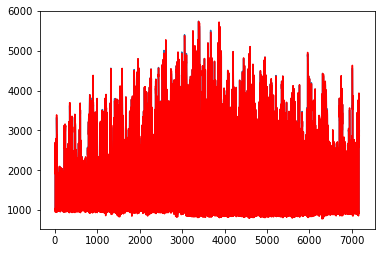

In [17]:


from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')

series = time_series_geo
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



In [21]:
predictions[0][0]

1918.4179008386814

In [30]:
forecast = model_fit.predict(start=len(time_series_geo), end=len(time_series_geo)+20)
forecast

array([ 9.7288438 ,  3.88328199, -1.78748108, -4.09133521,  0.53279649,
       -0.18259454, -0.01518138,  0.12859111,  0.15312192,  0.08035008,
        0.09215412,  0.08792331,  0.08471936,  0.08448563,  0.08559875,
        0.08540137,  0.08549942,  0.085566  ,  0.08556808,  0.08555175,
        0.08555512,  0.08555299])

In [35]:
forecast = model_fit.forecast(steps=1000)[0]
forecast

array([ 2871.7288438 ,  2875.61212579,  2873.82464471,  2869.7333095 ,
        2870.26610599,  2870.08351145,  2870.06833007,  2870.19692118,
        2870.3500431 ,  2870.43039318,  2870.5225473 ,  2870.6104706 ,
        2870.69518997,  2870.7796756 ,  2870.86527435,  2870.95067571,
        2871.03617514,  2871.12174114,  2871.20730922,  2871.29286097,
        2871.37841608,  2871.46396907,  2871.54952073,  2871.63507237,
        2871.72062423,  2871.80617604,  2871.89172789,  2871.97727976,
        2872.06283163,  2872.14838351,  2872.23393538,  2872.31948725,
        2872.40503912,  2872.49059099,  2872.57614286,  2872.66169473,
        2872.74724661,  2872.83279848,  2872.91835035,  2873.00390222,
        2873.08945409,  2873.17500596,  2873.26055783,  2873.3461097 ,
        2873.43166157,  2873.51721345,  2873.60276532,  2873.68831719,
        2873.77386906,  2873.85942093,  2873.9449728 ,  2874.03052467,
        2874.11607654,  2874.20162841,  2874.28718029,  2874.37273216,
      